In [9]:
from matplotlib import pyplot as plt
from matplotlib import axes
from matplotlib import pyplot
import pandas as pd
import numpy as np
import math
from scipy import stats
import csv
import statistics

from collections import Counter
from collections import defaultdict

result_path = "./KEY/"
df=pd.read_excel(result_path + "final_meta_all_processed - dummy+days+cmntrt.xlsx")

ref = {"Creation":"CREAT",
       "Participation":"PART",
       "Connection":"CXN", 
      }

stats=["celebrity", "professional", "amateur"]
df.head()

df=df.fillna(0)

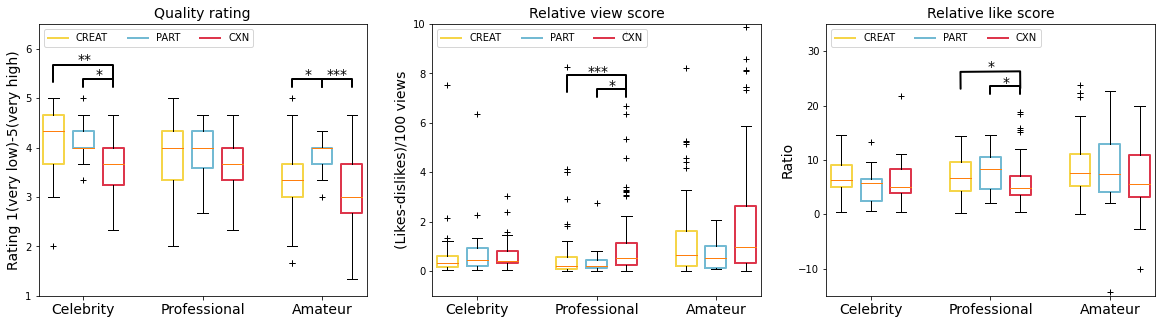

In [2]:
x_ticks = ["Celebrity", "Professional", "Amateur"]
def sub_fig(field, y_range):
    t=0
    colors2=["#F5D54A","#73BAD3","#DD364C","#ABA5A3","#469D8B"] # four styles
    bps=[]
    for k,v in ref.items(): # for each style
        data=[]
        pos=[1,5,9]
        for st in stats: # for each group
            s=df.loc[(df.merged_tagging==k)&(df.status==st)][field]
            data.append(s)
        boxprops = dict(linestyle='-', linewidth=2, color=colors2[t])
        bp=plt.boxplot(data,positions=[p+t for p in pos], sym='+', vert=1, whis=1.5,widths=0.7, boxprops=boxprops)
        bps.append(bp)
        plt.ylim(y_range)
        plt.xticks([2,6,10], x_ticks, fontsize=star_size)
        t+=1    
    ax.legend([bp["boxes"][0] for bp in bps], ref.values(), loc='upper left',ncol=4)

star_size=14    
props = {'connectionstyle':'bar','arrowstyle':'-','shrinkA':1,'shrinkB':1,'linewidth':2}    
plt.figure(figsize=(20,5))
ax=plt.subplot(1,3,1)
sub_fig("quality", (1,6.5))
plt.title("Quality rating", fontsize=14)
plt.ylabel("Rating 1(very low)-5(very high)", fontsize=star_size)

#Celebrity
ax.annotate("**", xy=(1.8,5.7), zorder=10, fontsize=star_size)
ax.annotate('', xy=(1,5.3), xytext=(3,5.3), arrowprops=props)
ax.annotate("*", xy=(2.4,5.4), zorder=10, fontsize=star_size)
ax.annotate('', xy=(2,5.2), xytext=(3,5.2), arrowprops=props)
#Amateur
ax.annotate("*", xy=(9.4,5.4), zorder=10, fontsize=star_size)
ax.annotate('', xy=(9,5.2), xytext=(10,5.2), arrowprops=props)
ax.annotate("***", xy=(10.15,5.4), zorder=10, fontsize=star_size)
ax.annotate('', xy=(10,5.2), xytext=(11,5.2), arrowprops=props)


ax=plt.subplot(1,3,2)
sub_fig("rel_vw", (-1,10))
plt.title("Relative view score", fontsize=14)
plt.ylabel("(Likes-dislikes)/100 views", fontsize=star_size)
ax.annotate("*", xy=(6.4,7.35), zorder=10, fontsize=star_size)
ax.annotate('', xy=(6,7), xytext=(7,7), arrowprops=props)
ax.annotate("***", xy=(5.7,7.9), zorder=10, fontsize=star_size)
ax.annotate('', xy=(5,7.2), xytext=(7,7.2), arrowprops=props)

ax=plt.subplot(1,3,3)
sub_fig("rel_like", (-15,35))
plt.title("Relative like score", fontsize=14)
plt.ylabel("Ratio", fontsize=star_size)
ax.annotate("*", xy=(5.9,26.4), zorder=10, fontsize=star_size)
ax.annotate('', xy=(5,22.9), xytext=(7,23), arrowprops=props)
ax.annotate("*", xy=(6.4,23.5), zorder=10, fontsize=star_size)
ax.annotate('', xy=(6,22), xytext=(7,22), arrowprops=props)

plt.savefig(result_path + "viz_qual_rt.png")

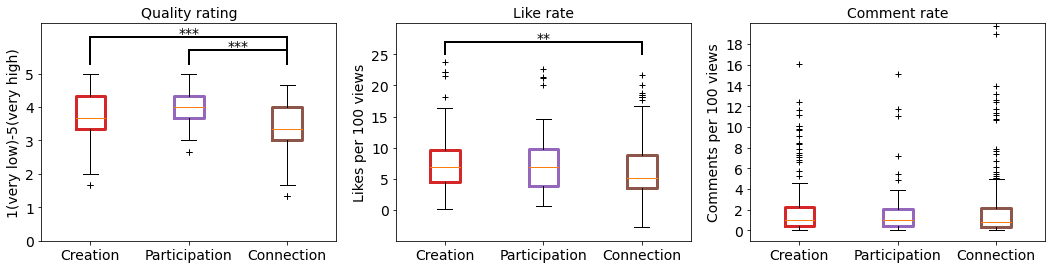

In [11]:
x_ticks = list(ref.keys())


def sub_fig(field, y_range):
    t=0
    colors2=["C3","C4","C5","C7"] # four styles
    bps=[]
    pos=[1,2,3]
    for k,v in ref.items(): # for each style
        data=[]
        s=df.loc[df.merged_tagging==k][field]
        data.append(s)
        boxprops = dict(linestyle='-', linewidth=3, color=colors2[t])
        bp=plt.boxplot(data,positions=[pos[t]], sym='+', vert=1, whis=1.5,widths=0.3, boxprops=boxprops)
        bps.append(bp)
        plt.ylim(y_range)
        t+=1    
    plt.xticks(pos, x_ticks, fontsize=star_size)

def draw_sigbar(x1,x2,y,h):
    plt.plot((x1,x2), (y+h,y+h), c="black", linewidth=2)
    plt.plot((x1,x1), (y,y+h), c="black", linewidth=2)
    plt.plot((x2,x2), (y,y+h), c="black", linewidth=2)

star_size=14    
props = {'connectionstyle':'bar','arrowstyle':'-','shrinkA':1,'shrinkB':1,'linewidth':2}    
plt.figure(figsize=(18,4))
ax=plt.subplot(1,3,1)
sub_fig("quality", (1,6.5))
plt.title("Quality rating", fontsize=14)
plt.yticks(range(6), fontsize=star_size)
plt.ylabel("1(very low)-5(very high)", fontsize=star_size)

#Celebrity
ax.annotate("***", xy=(2,6.1), zorder=10, fontsize=star_size, ha="center")
draw_sigbar(1,3,5.3,0.8)
ax.annotate("***", xy=(2.5,5.7), zorder=10, fontsize=star_size, ha="center")
draw_sigbar(2,3,5.3,0.4)


ax=plt.subplot(1,3,2)
sub_fig("rel_like", (-5,30))
plt.title("Like rate", fontsize=14)
plt.ylabel("Likes per 100 views", fontsize=star_size)
plt.yticks(range(0,30,5),fontsize=star_size)
ax.annotate("**", xy=(2,27), zorder=10, fontsize=star_size, ha="center")
draw_sigbar(1,3,25,2)

ax=plt.subplot(1,3,3)
sub_fig("rel_cmnt", (-1,20))
plt.title("Comment rate", fontsize=star_size)
plt.ylabel("Comments per 100 views", fontsize=star_size)
plt.yticks(range(0,20,2),fontsize=star_size)
# ax.annotate("*", xy=(6.4,7.35), zorder=10, fontsize=star_size)
# ax.annotate('', xy=(6,7), xytext=(7,7), arrowprops=props)
# ax.annotate("***", xy=(5.7,7.9), zorder=10, fontsize=star_size)
# ax.annotate('', xy=(5,7.2), xytext=(7,7.2), arrowprops=props)



# plt.savefig(result_path + "viz_qual_rt.png")
plt.savefig(result_path + "viz_qual_rt.eps", bbox_inches='tight')